<a href="https://colab.research.google.com/github/hdavidoff/datathon23/blob/main/image_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
generated = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Generated.parquet.gzip')
artworks = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Artwork.parquet.gzip')

import io
import matplotlib.pyplot as plt
import requests
from PIL import Image

def display_artwork(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

def get_AI_gen(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    return image

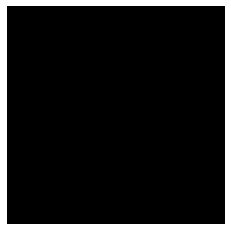

In [7]:
val = 7
display_artwork(generated.url.values[val])

In [ ]:
img = get_AI_gen(generated.url.values[val])

In [ ]:
img.getbands()

('R', 'G', 'B')

In [ ]:
pal = img.getpalette()
print(pal)

None


In [ ]:
val = 5
img2 = get_AI_gen(generated.url.values[val])

In [ ]:
pal2 = img2.getpalette()
print(pal2)

None


In [ ]:
img2.histogram()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 3,
 3,
 3,
 5,
 8,
 7,
 6,
 9,
 13,
 26,
 36,
 30,
 60,
 75,
 101,
 131,
 153,
 220,
 262,
 327,
 382,
 427,
 526,
 607,
 714,
 844,
 934,
 1162,
 1368,
 1570,
 1705,
 1849,
 2072,
 2244,
 2368,
 2577,
 2321,
 2350,
 2176,
 2000,
 1854,
 1690,
 1651,
 1541,
 1503,
 1511,
 1505,
 1525,
 1478,
 1536,
 1469,
 1767,
 1642,
 1665,
 1698,
 1701,
 1793,
 1869,
 1928,
 1936,
 1941,
 1980,
 1978,
 1990,
 2148,
 2053,
 2020,
 2106,
 1991,
 2033,
 2020,
 2028,
 2025,
 2018,
 2032,
 2017,
 2018,
 2037,
 1985,
 1956,
 1781,
 1886,
 1889,
 2142,
 2036,
 2122,
 2224,
 2309,
 2486,
 2758,
 2960,
 3181,
 3472,
 3642,
 3835,
 3786,
 3844,
 3704,
 3340,
 3200,
 2719,
 2516,
 2090,
 1597,
 1288,
 995,
 778,
 663,
 524,
 471,
 421,
 409,
 426,
 421,
 404,
 474,
 425,
 417,
 432,
 416,
 425,
 478,
 435,
 409,
 399,
 390,
 435,
 435,
 411,
 418,
 379,
 407,
 432,
 419,
 418,
 407,
 390,
 419,
 395,
 381,
 438,
 436,
 478,
 411,
 522,
 467,
 484,
 436,
 472

In [ ]:
cols = img2.getdata()
print(cols)

Comparing histograms split by color

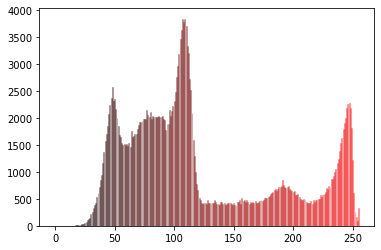

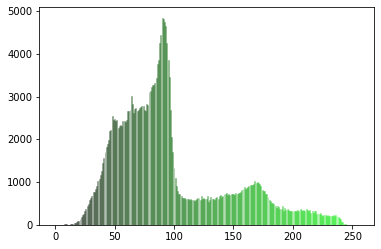

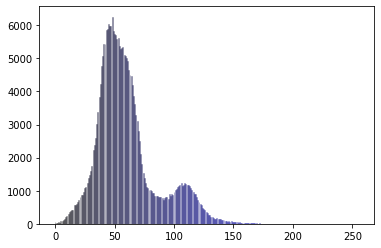

In [ ]:
# https://pythontic.com/image-processing/pillow/histogram
def getRed(redVal):

    return '#%02x%02x%02x' % (redVal, 0, 0)

 

def getGreen(greenVal):

    return '#%02x%02x%02x' % (0, greenVal, 0)

   

def getBlue(blueVal):

    return '#%02x%02x%02x' % (0, 0, blueVal)


# Get the color histogram of the image

histogram = img2.histogram()

 
l1 = histogram[0:256] # R


l2 = histogram[256:512] # B


l3 = histogram[512:768] # G

 
plt.figure(0)

 
# R histogram

for i in range(0, 256):

    plt.bar(i, l1[i], color = getRed(i), edgecolor=getRed(i), alpha=0.3)

 
# G histogram

plt.figure(1)

for i in range(0, 256):

    plt.bar(i, l2[i], color = getGreen(i), edgecolor=getGreen(i),alpha=0.3)

  

# B histogram

plt.figure(2)

for i in range(0, 256):

    plt.bar(i, l3[i], color = getBlue(i), edgecolor=getBlue(i),alpha=0.3)

 

plt.show()

In [2]:
%pip install scipy
from scipy.stats import gaussian_kde

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%pip install seaborn
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


NameError: ignored

<Figure size 360x360 with 0 Axes>

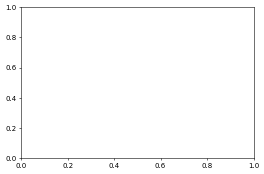

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(5,5))
fig,ax = plt.subplots(1,1,dpi=50)
sns.kdeplot(l1,color='r',fill=True)
sns.kdeplot(l2,color='b',fill=True)
sns.kdeplot(l3,color='g',fill=True)
ax.set_ylabel("")
ax.set(yticklabels=[])
ax.set(xticklabels=[])
ax.tick_params(left=False,bottom=False)

In [ ]:
fig.savefig('img2_hist.png')

In [ ]:
img_h = Image.open('img2_hist.png')

In [ ]:
pixels = list(img_h.getdata())

In [ ]:
img_h.size

(300, 200)

In [ ]:
#pip install keras

In [ ]:
# for loading/processing the images  
#import keras.preprocessing.image 
#from keras.applications.vgg16 import preprocess_input 

In [ ]:
len(pixels)
import numpy as np

In [ ]:
def gen_hist_img(image_in,id,ai_or_pers = 'AI'):
  histogram = image_in.histogram()
  l1 = histogram[0:256]
  l2 = histogram[256:512] # B
  l3 = histogram[512:768] # G
  figure(figsize=(5,5))
  fig,ax = plt.subplots(1,1,dpi=90)
  sns.kdeplot(l1,color='r',fill=True)
  sns.kdeplot(l2,color='b',fill=True)
  sns.kdeplot(l3,color='g',fill=True)
  ax.set_ylabel("")
  ax.set(yticklabels=[])
  ax.set(xticklabels=[])
  ax.tick_params(left=False,bottom=False)
  if ai_or_pers == 'AI':
    file_name = 'ai_'+str(id)+'_hist.png'
    folder = 'ai_hist/'
    fig.savefig(folder+file_name)
    fig.clf()
    plt.close()
  else:
    file_name = 'orig_'+str(id)+'_hist.png'
    folder = 'orig_hist/'
    fig.savefig(folder+file_name)
    fig.clf()
    plt.close()
    

In [76]:
for i in range(110,200):
  val = i
  orig_or_AI = 'AI'
  img2 = get_AI_gen(generated.url.values[val])
  gen_hist_img(img2,val,orig_or_AI)

<ipython-input-74-23bb2f95e8a3>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(1,1,dpi=90)
<ipython-input-74-23bb2f95e8a3>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(5,5))
<ipython-input-74-23bb2f95e8a3>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(1,1,

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [ ]:
generated.shape ##3447 AI generated images

(3447, 2)

In [ ]:
len(generated)

3447

In [ ]:
for i in range(0,len(artworks)):
  val = i
  orig_or_AI = 'orig'
  img2 = get_AI_gen(artworks.image_url.values[val])
  gen_hist_img(img2,val,orig_or_AI)

In [82]:
def batch_process_orig(val,orig_or_AI):
  img2 = get_AI_gen(artworks.image_url.values[val])
  gen_hist_img(img2,val,orig_or_AI)

In [5]:
pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from joblib import Parallel,delayed
from tqdm import tqdm

In [91]:
%%time
result = Parallel(n_jobs=8)(
    delayed(batch_process_orig)
    (val,'orig')
    for val in tqdm(range(0,len(artworks)))
)

 21%|██▏       | 2256/10517 [08:31<27:05,  5.08it/s]/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|██████████| 10517/10517 [38:57<00:00,  4.50it/s]


CPU times: user 6min 26s, sys: 3min 14s, total: 9min 40s
Wall time: 39min 2s


In [92]:
def batch_process_AI(val,orig_or_AI):
  img2 = get_AI_gen(generated.url.values[val])
  gen_hist_img(img2,val,orig_or_AI)

In [94]:
%%time
result = Parallel(n_jobs=8)(
    delayed(batch_process_AI)
    (val,'AI')
    for val in tqdm(range(0,len(generated)))
)



  0%|          | 0/3447 [00:00<?, ?it/s]

  0%|          | 8/3447 [00:00<05:04, 11.29it/s]

  0%|          | 16/3447 [00:07<32:01,  1.79it/s]

  1%|          | 24/3447 [00:12<31:37,  1.80it/s]

  1%|          | 32/3447 [00:14<25:55,  2.20it/s]

  1%|          | 40/3447 [00:16<20:06,  2.82it/s]

  1%|▏         | 48/3447 [00:17<16:06,  3.52it/s]

  2%|▏         | 56/3447 [00:18<13:51,  4.08it/s]

  2%|▏         | 64/3447 [00:19<12:33,  4.49it/s]

  2%|▏         | 72/3447 [00:22<13:45,  4.09it/s]

  2%|▏         | 80/3447 [00:23<11:57,  4.69it/s]

  3%|▎         | 88/3447 [00:25<11:39,  4.80it/s]

  3%|▎         | 96/3447 [00:26<11:13,  4.98it/s]

  3%|▎         | 104/3447 [00:27<10:25,  5.34it/s]

  3%|▎         | 112/3447 [00:28<09:48,  5.67it/s]

  3%|▎         | 120/3447 [00:30<09:14,  6.00it/s]

  4%|▎         | 128/3447 [00:31<09:04,  6.10it/s]

  4%|▍         | 136/3447 [00:33<09:47,  5.64it/s]

  4%|▍         | 144/3447 [00:34<09:24,  5.85it/s]

  4%|▍         | 152/3447 [00:36<

CPU times: user 57.8 s, sys: 2.15 s, total: 59.9 s
Wall time: 11min 10s


In [97]:
!zip -r '/content/ai_hist.zip' '/content/ai_hist/' 

  adding: content/ai_hist/ (stored 0%)
  adding: content/ai_hist/ai_2536_hist.png (deflated 7%)
  adding: content/ai_hist/ai_909_hist.png (deflated 6%)
  adding: content/ai_hist/ai_574_hist.png (deflated 4%)
  adding: content/ai_hist/ai_536_hist.png (deflated 6%)
  adding: content/ai_hist/ai_2819_hist.png (deflated 5%)
  adding: content/ai_hist/ai_2258_hist.png (deflated 6%)
  adding: content/ai_hist/ai_1770_hist.png (deflated 15%)
  adding: content/ai_hist/ai_2196_hist.png (deflated 7%)
  adding: content/ai_hist/ai_1115_hist.png (deflated 15%)
  adding: content/ai_hist/ai_619_hist.png (deflated 5%)
  adding: content/ai_hist/ai_3202_hist.png (deflated 9%)
  adding: content/ai_hist/ai_2052_hist.png (deflated 5%)
  adding: content/ai_hist/ai_2712_hist.png (deflated 15%)
  adding: content/ai_hist/ai_67_hist.png (deflated 4%)
  adding: content/ai_hist/ai_51_hist.png (deflated 15%)
  adding: content/ai_hist/ai_1324_hist.png (deflated 5%)
  adding: content/ai_hist/ai_731_hist.png (deflated 1

In [98]:
!zip -r '/content/orig_hist.zip' '/content/orig_hist/' 

Streaming output truncated to the last 5000 lines.
  adding: content/orig_hist/orig_148_hist.png (deflated 6%)
  adding: content/orig_hist/orig_10208_hist.png (deflated 7%)
  adding: content/orig_hist/orig_2489_hist.png (deflated 9%)
  adding: content/orig_hist/orig_1827_hist.png (deflated 7%)
  adding: content/orig_hist/orig_4779_hist.png (deflated 6%)
  adding: content/orig_hist/orig_6170_hist.png (deflated 7%)
  adding: content/orig_hist/orig_10444_hist.png (deflated 8%)
  adding: content/orig_hist/orig_8208_hist.png (deflated 7%)
  adding: content/orig_hist/orig_2276_hist.png (deflated 6%)
  adding: content/orig_hist/orig_2173_hist.png (deflated 9%)
  adding: content/orig_hist/orig_3694_hist.png (deflated 7%)
  adding: content/orig_hist/orig_5101_hist.png (deflated 9%)
  adding: content/orig_hist/orig_3243_hist.png (deflated 6%)
  adding: content/orig_hist/orig_10187_hist.png (deflated 7%)
  adding: content/orig_hist/orig_8867_hist.png (deflated 6%)
  adding: content/orig_hist/orig

Now that all the histograms have been made for the original and AI generated images, load in all of the images, calculate their pixel values and save each as a row in a dataframe with the number in the file name as the id

eventually join on generated Or artworks depending on the origin folder

In [4]:
from tensorflow.keras.utils import img_to_array

In [5]:
def image_to_row_orig(val):
  #for every val in generated and artworks
  #make row in table
  fn = '/content/orig_hist/orig_'+str(val)+'_hist.png'
  img = Image.open(fn)
  pxs = img_to_array(img)
  pxs = pxs.ravel()
  pxs = np.append(pxs,val)
  pxs.shape
  return pxs


In [15]:
def image_to_row_orig_75(val):
  #for every val in generated and artworks
  #make row in table
  fn = '/content/orig_hist/orig_'+str(val)+'_hist.png'
  img = cv2.imread(fn)
  img_75 = cv2.resize(img, None, fx = 0.75, fy = 0.75)
  pxs = img_75.ravel()
  pxs = np.append(pxs,val)
  pxs.shape
  return pxs

In [7]:
import cv2
img = cv2.imread('/content/orig_hist/orig_3773_hist.png')
img_75 = cv2.resize(img, None, fx = 0.75, fy = 0.75)

In [13]:
img_75.shape
img_75_ravel=img_75.ravel()
img_75_ravel.shape

(419904,)

In [20]:
def image_to_row_gen_75(val):
  #for every val in generated and artworks
  #make row in table
  fn = '/content/ai_hist/ai_'+str(val)+'_hist.png'
  img = cv2.imread(fn)
  img_75 = cv2.resize(img, None, fx = 0.75, fy = 0.75)
  pxs = img_75.ravel()
  pxs = np.append(pxs,val)
  pxs.shape
  return pxs

In [ ]:
def image_to_row_gen(val):
  #for every val in generated and artworks
  #make row in table
  fn = '/content/ai_hist/ai_'+str(val)+'_hist.png'
  img = Image.open(fn)
  pxs = img_to_array(img)
  pxs = pxs.ravel()
  pxs = np.append(pxs,val)
  pxs.shape
  return pxs

In [16]:
import numpy as np
orig_px = [image_to_row_orig_75(val) for val in range(0,100)]

In [17]:
orig_stack = np.stack(orig_px)
orig_stack.shape

(100, 419905)

In [18]:
orig_idx = orig_stack[:,-1]
orig_pd = pd.DataFrame(orig_stack[:,:-1],index=orig_idx)
orig_pd['label']='orig'
orig_pd.head()


,0,1,2,3,4,5,6,7,8,9,...,419895,419896,419897,419898,419899,419900,419901,419902,419903,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,orig
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,orig
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,orig
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,orig
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,orig


In [21]:
gen_px = [image_to_row_gen_75(val) for val in range(0,100)]
gen_stack = np.stack(gen_px)
gen_stack.shape

(100, 419905)

In [22]:
gen_idx = gen_stack[:,-1]
gen_pd = pd.DataFrame(gen_stack[:,:-1],index=gen_idx)
gen_pd['label']='AI'
gen_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,419895,419896,419897,419898,419899,419900,419901,419902,419903,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,AI
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,AI
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,AI
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,AI
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,AI


In [23]:
from sklearn.cluster import KMeans


In [24]:
gen_orig = pd.concat([orig_pd,gen_pd])
gen_orig.shape

(200, 419905)

In [25]:
gen_orig=gen_orig.to_numpy()

In [27]:
gen_orig.shape

(200, 419905)

In [29]:
from sklearn.decomposition import PCA
pca_dims = PCA()

In [31]:
pca_dims.fit(gen_orig[:,:-1])
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
#d = 144 dimensions as output, don't rerun, costly computation

In [32]:
d

144

In [34]:
pca = PCA(n_components = 144)
X_red = pca.fit_transform(gen_orig[:,:-1])

In [35]:
X_red.shape

(200, 144)

In [36]:
clusters = KMeans(2,random_state=42)
label = clusters.fit_predict(X_red)

In [37]:
label_0 = gen_orig[label == 0]
label_1 = gen_orig[label == 1]

In [38]:
label_0

array([[255, 255, 255, ..., 255, 255, 'orig'],
       [255, 255, 255, ..., 255, 255, 'orig'],
       [255, 255, 255, ..., 255, 255, 'orig'],
       ...,
       [255, 255, 255, ..., 255, 255, 'AI'],
       [255, 255, 255, ..., 255, 255, 'AI'],
       [255, 255, 255, ..., 255, 255, 'AI']], dtype=object)

([<matplotlib.axis.XTick at 0x7f84f0394310>,
 <a list of 144 Text major ticklabel objects>)

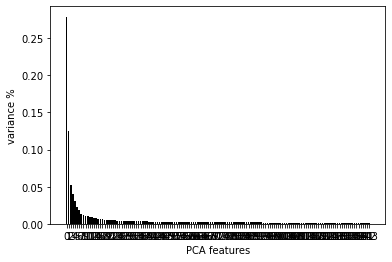

In [39]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

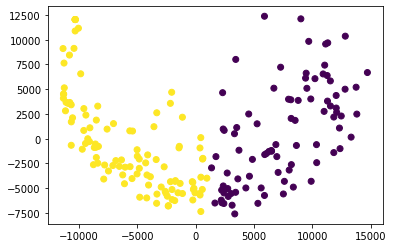

In [42]:
plot = plt.scatter(X_red[:,0], X_red[:,1], c=label)


In [ ]:
## SOM?
## want to find the black squares
# connect this data to artists/movements